In [1]:
# Source
# - https://www2.deloitte.com/content/dam/Deloitte/us/Documents/strategy/us-cons-life-insurance-consumer-study.pdf

# People to pitch to
# - Married
# - Parent
#   - KIDS_CLOTHING_SHOP
#   - TOY_SHOP
#   - CHILDRENS_SHOP
#   - SCHOOL_SUPPLY_SHOP
#   - KIDS_ACTIVITY_CENTRE
# - Homeowner
#   - HOME_IMPROVEMENT_STORE
#   - DIY_STORE
# - Pet Owner
#   - PET_SHOP
#   - PET_TOY_SHOP
# - Gross Value Moved
#   - sent_tx_sum_gbp
#   - received_tx_sum_gbp

## Importing Libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from statistics import mean, median
import matplotlib.pyplot as plt

## Importing CSV

In [3]:
# Loading csv and setting to 
user_data = pd.read_csv('../SavedData/Lloyds_users.csv')
user_df = pd.DataFrame(user_data)

# Changing the lists back to normal columns
user_df['user_biz_interaction'] = user_df['user_biz_interaction'].apply(ast.literal_eval)
user_df['user_biz_interaction_frequency'] = user_df['user_biz_interaction_frequency'].apply(ast.literal_eval)
user_df['user_biz_spend'] = user_df['user_biz_spend'].apply(ast.literal_eval)
user_df['user_user_interaction'] = user_df['user_user_interaction'].apply(ast.literal_eval)
user_df['user_user_interaction_frequency'] = user_df['user_user_interaction_frequency'].apply(ast.literal_eval)
user_df['user_user_spend'] = user_df['user_user_spend'].apply(ast.literal_eval)
user_df['user_industry_interaction'] = user_df['user_industry_interaction'].apply(ast.literal_eval)
user_df['user_industry_interaction_frequency'] = user_df['user_industry_interaction_frequency'].apply(ast.literal_eval)
user_df['user_industry_spend'] = user_df['user_industry_spend'].apply(ast.literal_eval)
user_df['user_date_transaction'] = user_df['user_date_transaction'].apply(ast.literal_eval)
user_df['user_date_transaction_freq'] = user_df['user_date_transaction_freq'].apply(ast.literal_eval)

## Setting Classification Lists

In [4]:
target_biz_list = [
    "KIDS_CLOTHING_SHOP",
    "TOY_SHOP",
    "CHILDRENS_SHOP",
    "SCHOOL_SUPPLY_STORE",
    "KIDS_ACTIVITY_CENTRE",
    "HOME_IMPROVEMENT_STORE",
    "DIY_STORE",
    "PET_SHOP",
    "PET_TOY_SHOP"
]

parent_biz_list = [
    "KIDS_CLOTHING_SHOP",
    "TOY_SHOP",
    "CHILDRENS_SHOP",
    "SCHOOL_SUPPLY_STORE",
    "KIDS_ACTIVITY_CENTRE"
]

homeowner_biz_list = [
    "HOME_IMPROVEMENT_STORE",
    "DIY_STORE"
]

pet_biz_list = [
    "PET_SHOP",
    "PET_TOY_SHOP"
]

money_move_list = [
    "sent_tx_sum_gbp",
    "received_tx_sum_gbp"
]

## Target Biz Spend List

In [5]:
target_biz_spend_list = []

target_biz_list_dict = {key: [] for key in target_biz_list}

for user_index in range(0, len(user_df)):
    target_biz_spend = 0
    
    target_biz_int_dict = {key: 0 for key in target_biz_list}
    
    for biz in target_biz_list:
        interaction_list = user_df['user_biz_interaction'].iloc[user_index]
        interaction_spend_list = user_df['user_biz_spend'].iloc[user_index]

        try: 
            target_biz_pos = interaction_list.index(biz)
            target_biz_spend += float(interaction_spend_list[target_biz_pos])
            
            target_biz_int_dict[biz] += float(interaction_spend_list[target_biz_pos])
            target_biz_list_dict[biz].append(target_biz_int_dict[biz])

        except:
            target_biz_spend += 0
            target_biz_list_dict[biz].append(0)
        
    target_biz_spend_list.append(target_biz_spend)

## Money Move List

In [7]:
user_money_moved = (user_df.set_index('user_id')[['sent_tx_sum_gbp', 'received_tx_sum_gbp']].sum(axis=1)).to_dict()
user_money_moved_list = list(user_money_moved.values())

## Industry Specific Lists

In [8]:
# Parent List
parent_sum_list = [sum(ints) for ints in zip(target_biz_list_dict['KIDS_CLOTHING_SHOP'], 
                                             target_biz_list_dict['TOY_SHOP'], 
                                             target_biz_list_dict['CHILDRENS_SHOP'], 
                                             target_biz_list_dict['SCHOOL_SUPPLY_STORE'], 
                                             target_biz_list_dict['KIDS_ACTIVITY_CENTRE'])]

# Homeowner List
home_sum_list = [sum(ints) for ints in zip(target_biz_list_dict['HOME_IMPROVEMENT_STORE'], 
                                             target_biz_list_dict['DIY_STORE'])]

# Pet Owner List
pet_sum_list = [sum(ints) for ints in zip(target_biz_list_dict['PET_SHOP'], 
                                             target_biz_list_dict['PET_TOY_SHOP'])]

# Total Spend List
total_sum_list = [sum(ints) for ints in zip(target_biz_list_dict['KIDS_CLOTHING_SHOP'], 
                                             target_biz_list_dict['TOY_SHOP'], 
                                             target_biz_list_dict['CHILDRENS_SHOP'], 
                                             target_biz_list_dict['SCHOOL_SUPPLY_STORE'], 
                                             target_biz_list_dict['KIDS_ACTIVITY_CENTRE'],
                                             target_biz_list_dict['HOME_IMPROVEMENT_STORE'], 
                                             target_biz_list_dict['DIY_STORE'],
                                             target_biz_list_dict['PET_SHOP'], 
                                             target_biz_list_dict['PET_TOY_SHOP'])]



In [22]:
parent_spend_length = len([val for val in parent_sum_list if val > 500])
home_spend_length = len([val for val in home_sum_list if val > 500])
pet_spend_length = len([val for val in pet_sum_list if val > 500])

print(parent_spend_length)
print(home_spend_length)
print(pet_spend_length)

2432
459
110


## User Insurance DataFrame

In [23]:
ordered_user_ids = list(user_money_moved.keys())

In [31]:
insurance_df = pd.DataFrame({
    'user': ordered_user_ids,
    'parent spending': parent_sum_list,
    'home spending': home_sum_list,
    'pet spending': pet_sum_list,
    'total spending': total_sum_list,
    'total money moved': user_money_moved_list
    
})

insurance_df['parent home pet positive'] = ((insurance_df['parent spending'] > 20) & 
                      (insurance_df['home spending'] > 20) & 
                      (insurance_df['pet spending'] > 20)).astype(int)

In [32]:
candidate_insurance_df = insurance_df[insurance_df['parent home pet positive'] == 1]

In [33]:
len(candidate_insurance_df)

531

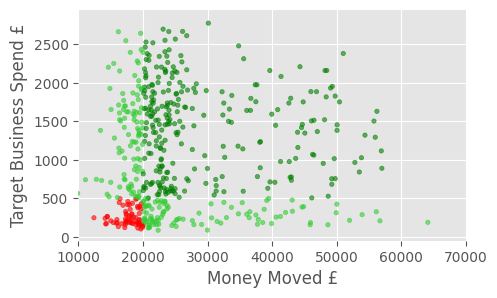

In [24]:
colors = []

for x, y in zip(candidate_insurance_df['total money moved'], candidate_insurance_df['total spending']):
    if x > 20000 and y > 500:
        colors.append('green')
    elif x > 20000 or y > 500:
        colors.append('limegreen')
    else:
        colors.append('red')
        
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.scatter(candidate_insurance_df['total money moved'], candidate_insurance_df['total spending'], color=colors, marker='o', s=10, alpha=0.6)  # 's' sets the size of the markers
plt.xlabel('Money Moved £')
plt.xlim(10000, 70000)
plt.ylabel('Target Business Spend £')
plt.grid(True)  # Adds a grid
plt.show()